In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
winedata = pd.read_csv("/home/dheerus/Desktop/Python/Wine Data Prediction/winequality-red.csv")
winedata.describe()
winedata.info()
winedata.head(10)
winedata["fixed acidity"].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: fixed acidity
Non-Null Count  Dtype  
---

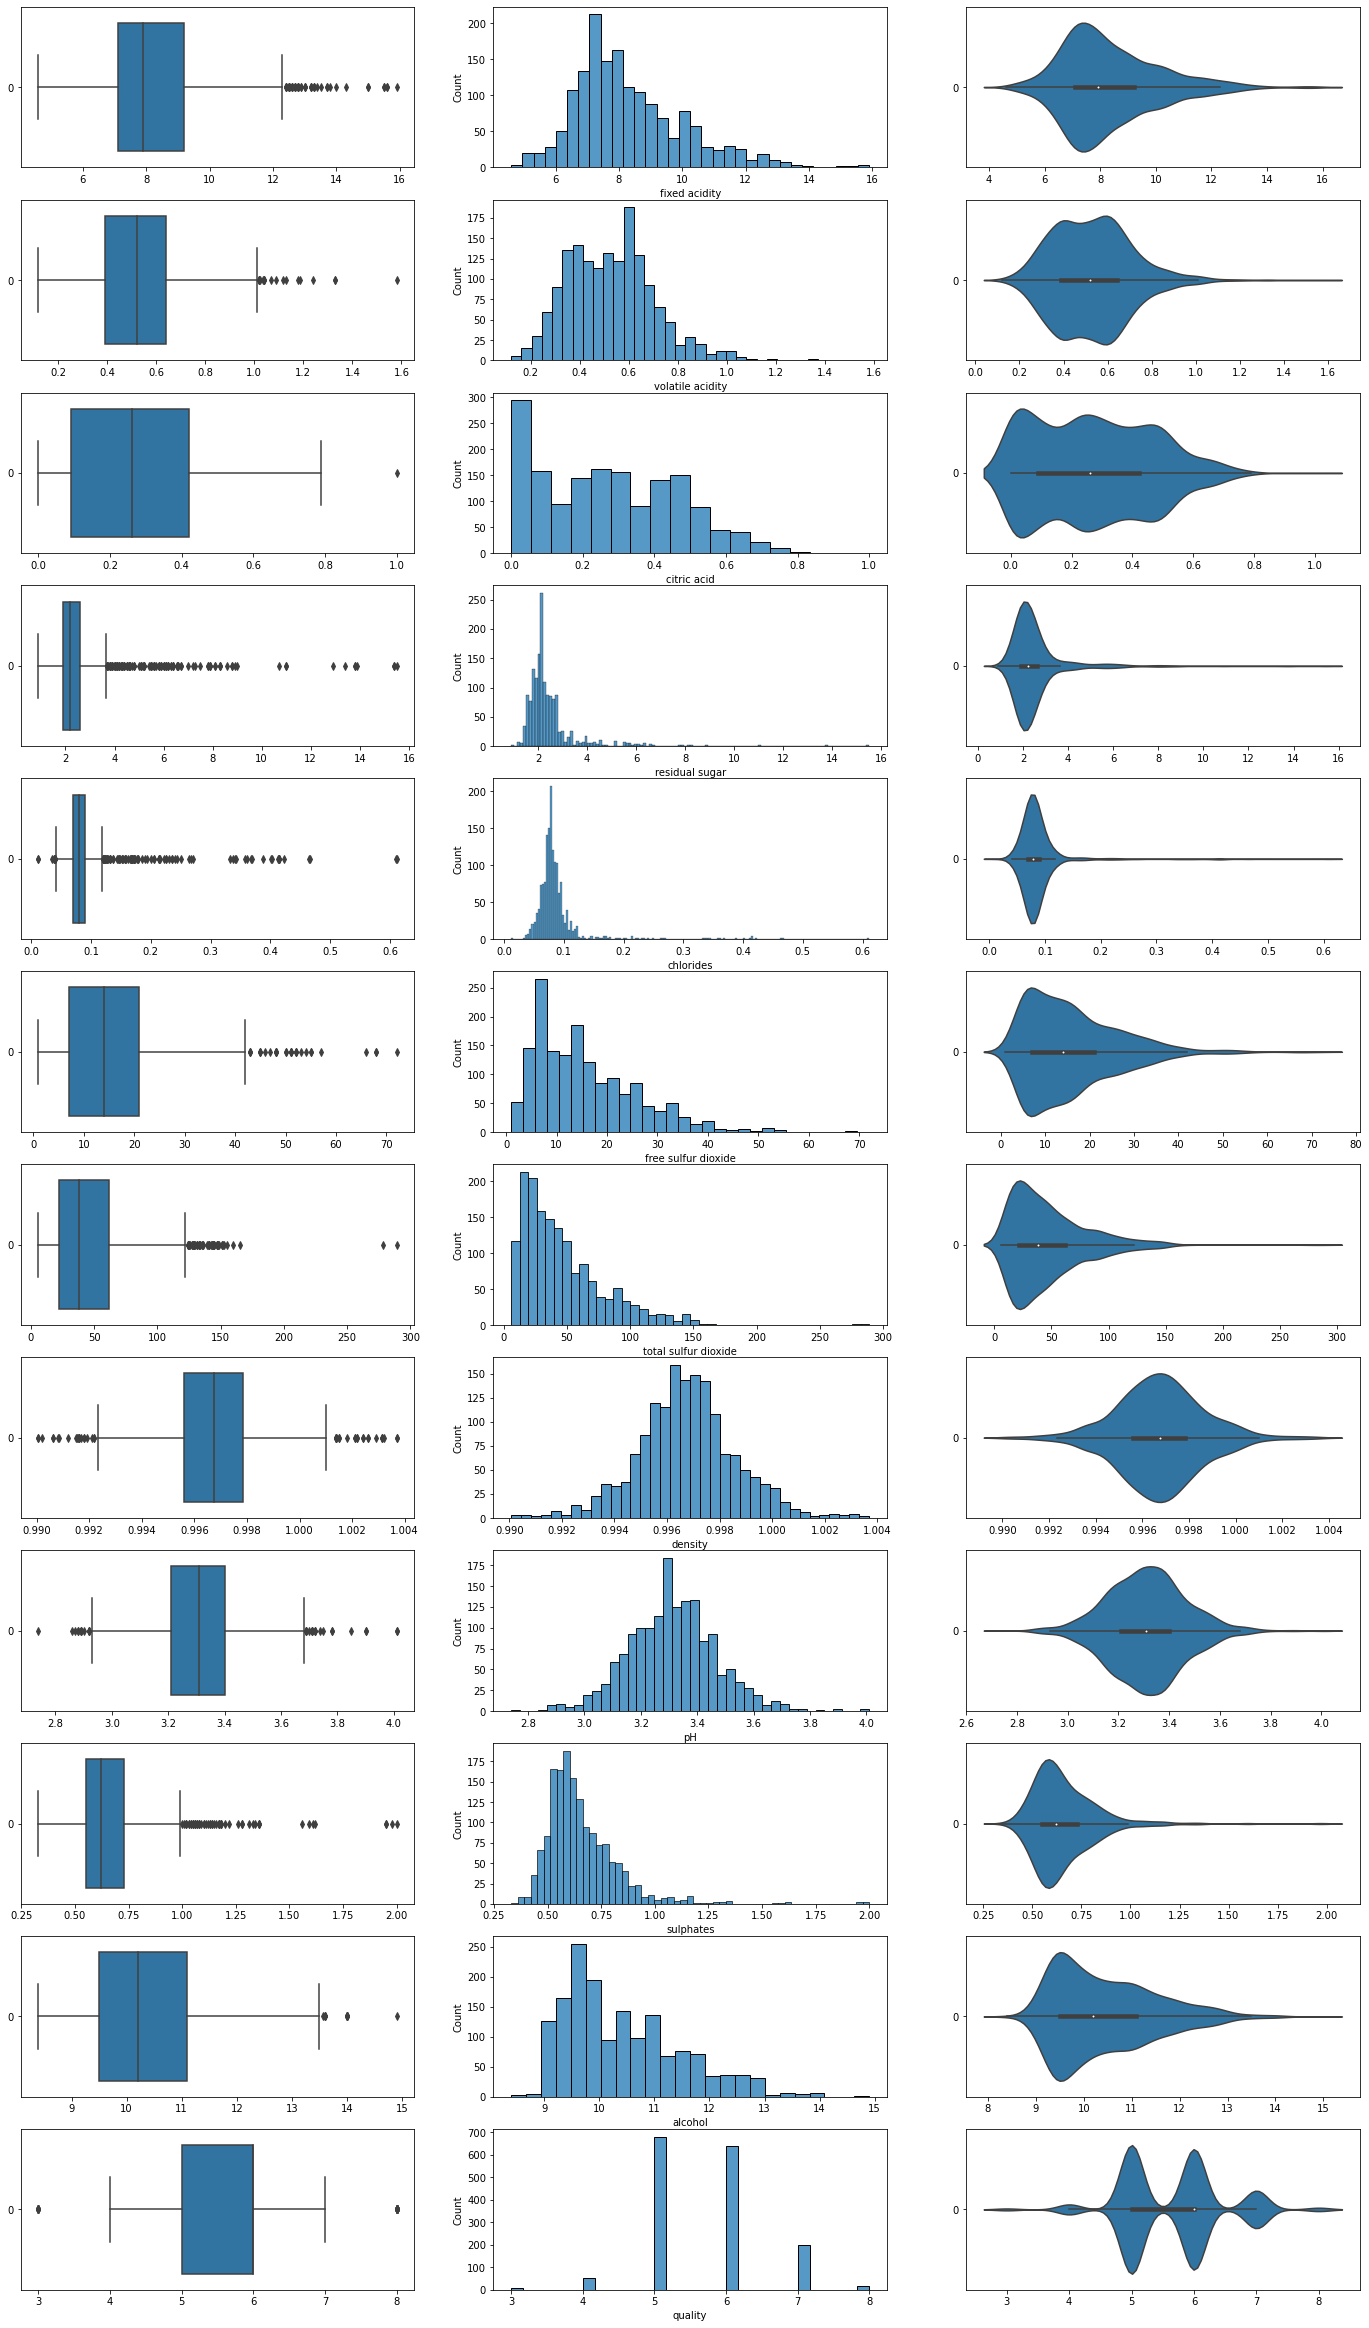

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier

f, axes = plt.subplots(12, 3, figsize=(24, 42))
count = 0
for var in winedata:
    sb.boxplot(data = winedata[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = winedata[var], ax = axes[count,1])
    sb.violinplot(data = winedata[var], orient = "h", ax = axes[count,2])
    count += 1

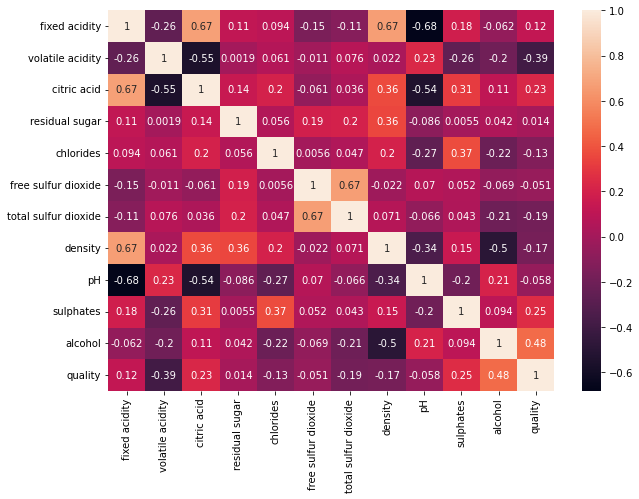

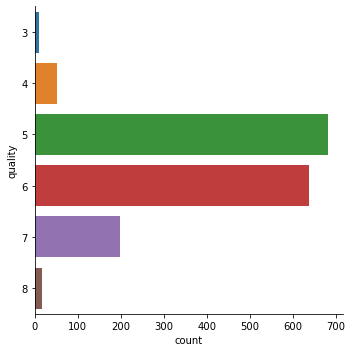

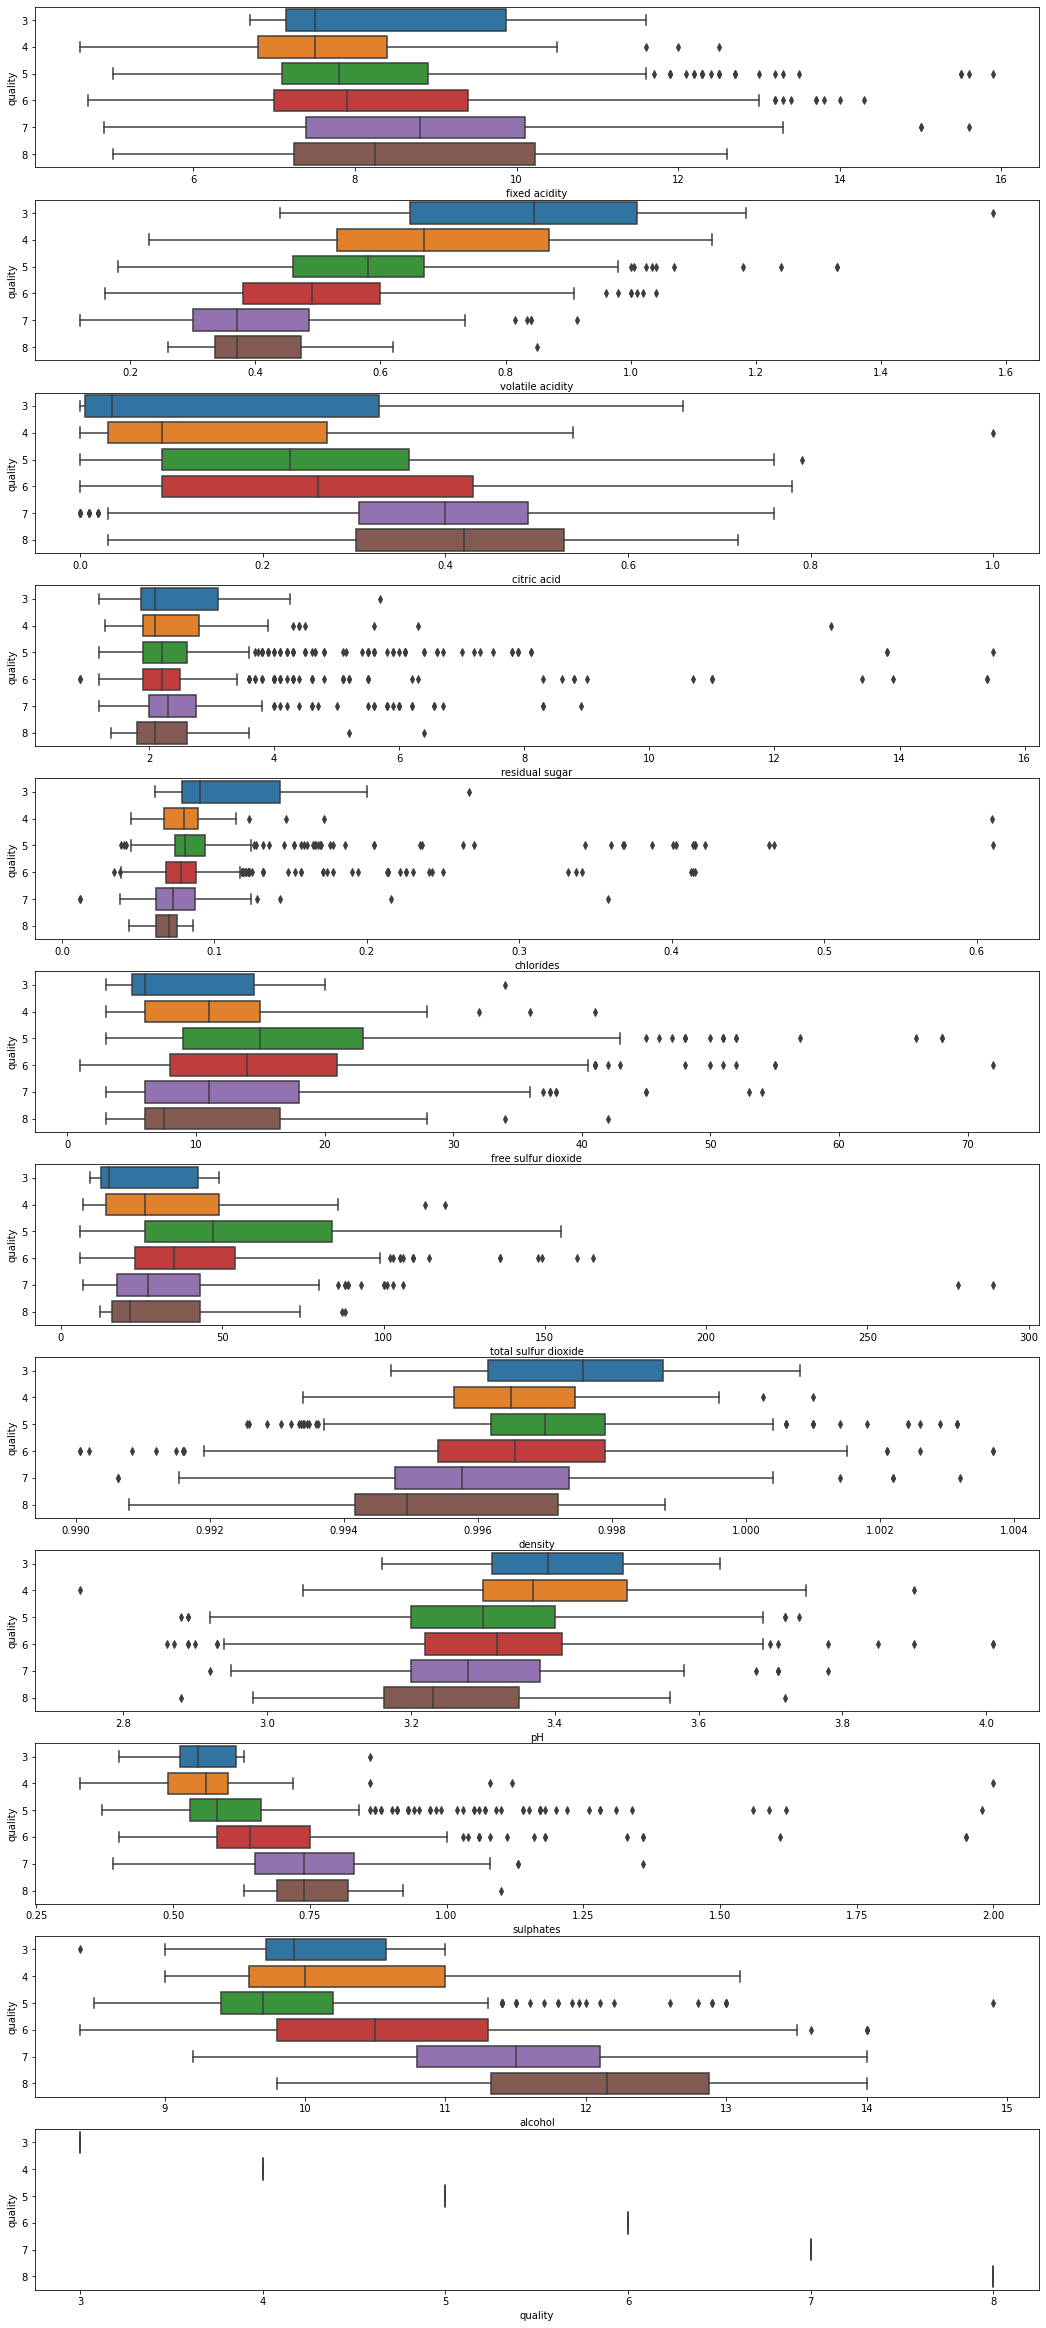

In [4]:
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(winedata.corr() , annot = True , ax = ax)
plt.show()
sb.catplot(y = "quality", data = winedata, kind = "count")
f, axes = plt.subplots(12, 1, figsize=(18, 42))

count = 0
for var in winedata:
    sb.boxplot(x = var, y = "quality", data = winedata, orient = "h", ax = axes[count])
    count += 1
q1=winedata.quantile(0.25)
q2=winedata.quantile(0.75)
IQR=q2-q1

In [5]:
winedata=winedata[((winedata<(q1-1.5*IQR))|(winedata>(q2+1.5*IQR))).any(axis=1)]
y = pd.DataFrame(winedata["quality"])
X = pd.DataFrame(winedata[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=5)

In [8]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [9]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7380952380952381



In [10]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5476190476190477



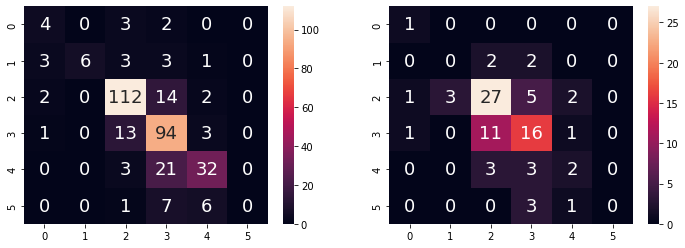

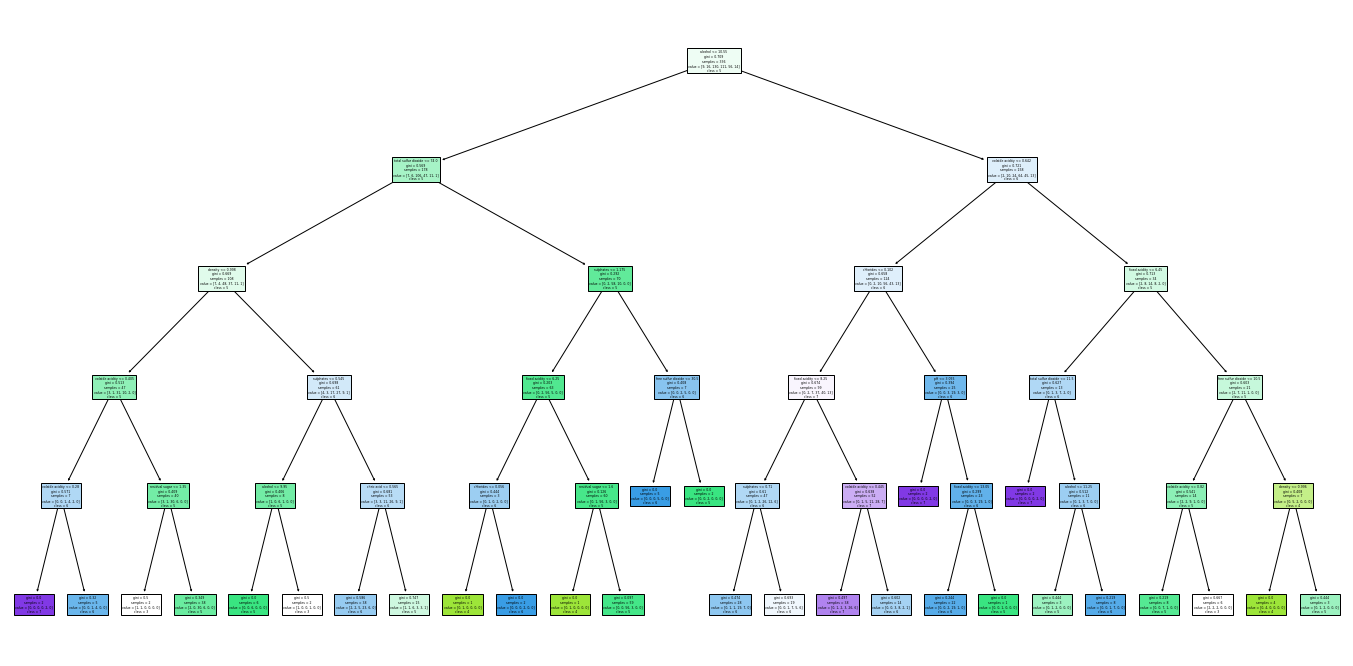

In [11]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

Quality of Red Wine:  2
bad     338
good     82
Name: quality category, dtype: int64


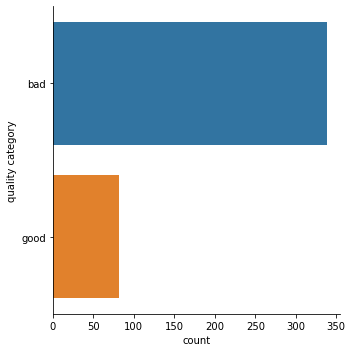

In [12]:
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
winedata = winedata.reindex(columns=winedata.columns.tolist() + ['quality category'])
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
winedata['quality category'] = pd.cut(winedata['quality'], bins = bins, labels = group_names)
winedata.head()
print("Quality of Red Wine: ",len(winedata["quality category"].unique()))


print(winedata["quality category"].value_counts())
sb.catplot(y = "quality category", data = winedata, kind = "count")